In [1]:
# take the general effect of amyloid lowering -> improved cognition rom the meta0analysis 
# Ackley SF, Zimmerman SC, Brenowitz WD, Tchetgen EJT, Gold AL, Manly JJ, Mayeda ER, Filshtein TJ, Power MC, Elahi FM, Brickman AM, Glymour MM. Effect of reductions in amyloid levels on cognitive change in randomized trials: instrumental variable meta-analysis. Bmj. 2021;372:n156.

## redtag - make sure to get the updated version of this that added teh extra data, there is an errata to the initial paper

# for all da

# this will give us change in amyloid lowering -> MMSE

allDataSUVRToMMSEMean = 0.034
allDataSUVRToMMSESE = 0.046

amyloidSUVRTToMMSEMean = 0.044
amyloidSUVRTToMMSESE = 0.049

# it looks like they have an version of this that uses CDR-SB in their appendix
# it also looks like they have an updated version of the analysis on their shiny app: https://amyloidintegratingevidence.shinyapps.io/Shiny/ 

In [2]:
# generate a prior — multiply the eneral effect by the distribution fo that association to get the expected effect of lecanemab
# redtag: need to clarify what SUVR means...going to assume that # going to assume that their degree of amyloid in % change in centiloids transfers to SUVR

# not sure if this should be on a relative scale or an absolute one
changeIn18MonthSUVRMean = 55.5
changeIn18MonthSUVRSE = 1.80

averageBaselineCentiloids = 76.5

relativeChangeIn18MonthSUVRMean = changeIn18MonthSUVRMean/averageBaselineCentiloids
relativeChangeIn18MonthSUVRSE = changeIn18MonthSUVRSE/averageBaselineCentiloids


# update the prior using the observed effect from the lecanemab trial...to get a posterior

In [3]:
meanCDRSBChangeWithLecanemabInTrial=-0.45
sdCDRSBChangeWithLecanemabInTrial=0.11

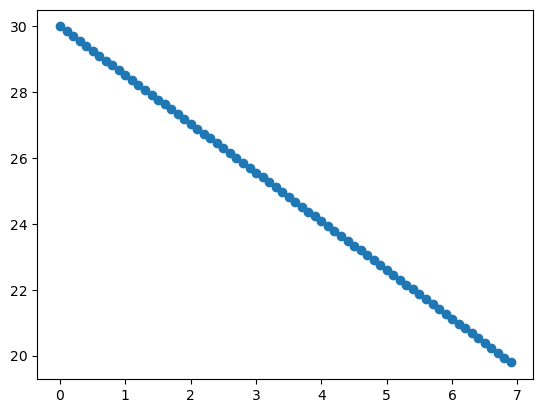

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# reproducing the MMSE -> CDR-SB measure converion from Ackley
# https://www.bmj.com/content/bmj/suppl/2021/02/25/bmj.n156.DC1/acks057847.ww.pdf
mmseToCDRSBIntercept = 30
mmseToCDRSBSlope = (20.75-30)/6.25

xs = np.arange(0, 7, .1)
ys = mmseToCDRSBIntercept + xs*mmseToCDRSBSlope
plt.scatter(xs, ys)

In [5]:
# use appendix 4 fro the ackley paper to convert the MMSE posterior to a postrioer aligned with teh primary outcomes of the lecanemab trial

In [6]:
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [10]:
# 1. surv to MMSE from paper
# 2. SUVR to CDR-SB from paper appendix
# 3. SURV to CDR-SB * lecanemabic SUVR change
# 5. lecanemab trial data on CDR-SB

with pm.Model() as model:
    suvrToMMSE = pm.Normal('suvrToMMSE', mu=allDataSUVRToMMSEMean, sigma =allDataSUVRToMMSESE)
    suvrToCDR = mmseToCDRSBIntercept + mmseToCDRSBSlope*suvrToMMSE
    lecanemabSUVRChange = pm.Normal('lecanemabSUVRChange', mu=relativeChangeIn18MonthSUVRMean, sigma =relativeChangeIn18MonthSUVRSE)
    
    priorSE = np.sqrt(relativeChangeIn18MonthSUVRSE**2/relativeChangeIn18MonthSUVRMean + allDataSUVRToMMSESE**2/allDataSUVRToMMSEMean)
    priorMean = suvrToCDR * lecanemabSUVRChange
    prior = pm.Normal('prior', mu=priorMean, sigma= priorSE)
    
    likelihood = pm.Normal('cdrChangeWithTreatment', mu=meanCDRSBChangeWithLecanemabInTrial, sigma=sdCDRSBChangeWithLecanemabInTrial)
    posterior = pm.Normal('posterior', mu=prior * likelihood, sigma=np.sqrt(priorSE**2/priorMean + sdCDRSBChangeWithLecanemabInTrial**2/meanCDRSBChangeWithLecanemabInTrial))
    pm.sample()

ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Elemwise{Cast{float64}}(TensorConstant{30})
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1925, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1084, in transform
    return self.fn(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/tensor/rewriting/basic.py", line 1141, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/link/c/op.py", line 1


You can find the C code in this temporary file: /var/folders/wd/wlg9qv65701fzmgdkdfy5vtm0000gr/T/pytensor_compilation_error_62q8dgtf


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Elemwise{Cast{float64}}(TensorConstant{30})
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1925, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1084, in transform
    return self.fn(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/tensor/rewriting/basic.py", line 1141, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/link/c/op.py", line 1


You can find the C code in this temporary file: /var/folders/wd/wlg9qv65701fzmgdkdfy5vtm0000gr/T/pytensor_compilation_error_qn8h75lm


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Elemwise{Cast{float64}}(TensorConstant{30})
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1925, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1084, in transform
    return self.fn(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/tensor/rewriting/basic.py", line 1141, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/link/c/op.py", line 1


You can find the C code in this temporary file: /var/folders/wd/wlg9qv65701fzmgdkdfy5vtm0000gr/T/pytensor_compilation_error_zu5fzvwq


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Elemwise{Cast{float64}}(TensorConstant{30})
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1925, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1084, in transform
    return self.fn(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/tensor/rewriting/basic.py", line 1141, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/link/c/op.py", line 1


You can find the C code in this temporary file: /var/folders/wd/wlg9qv65701fzmgdkdfy5vtm0000gr/T/pytensor_compilation_error_4htrlg0g


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Elemwise{Cast{float64}}(TensorConstant{30})
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1925, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1084, in transform
    return self.fn(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/tensor/rewriting/basic.py", line 1141, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/link/c/op.py", line 1


You can find the C code in this temporary file: /var/folders/wd/wlg9qv65701fzmgdkdfy5vtm0000gr/T/pytensor_compilation_error_w_j27cg1


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Elemwise{Cast{float64}}(TensorConstant{30})
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1925, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1084, in transform
    return self.fn(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/tensor/rewriting/basic.py", line 1141, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/link/c/op.py", line 1


You can find the C code in this temporary file: /var/folders/wd/wlg9qv65701fzmgdkdfy5vtm0000gr/T/pytensor_compilation_error_wkv7n_ou


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Elemwise{Cast{float64}}(TensorConstant{30})
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1925, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1084, in transform
    return self.fn(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/tensor/rewriting/basic.py", line 1141, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/link/c/op.py", line 1


You can find the C code in this temporary file: /var/folders/wd/wlg9qv65701fzmgdkdfy5vtm0000gr/T/pytensor_compilation_error_m5_u5l9x


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Elemwise{Cast{float64}}(TensorConstant{30})
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1925, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1084, in transform
    return self.fn(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/tensor/rewriting/basic.py", line 1141, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/link/c/op.py", line 1


You can find the C code in this temporary file: /var/folders/wd/wlg9qv65701fzmgdkdfy5vtm0000gr/T/pytensor_compilation_error_apt_tk9x


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Elemwise{Cast{float64}}(TensorConstant{30})
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1925, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1084, in transform
    return self.fn(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/tensor/rewriting/basic.py", line 1141, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/link/c/op.py", line 1


You can find the C code in this temporary file: /var/folders/wd/wlg9qv65701fzmgdkdfy5vtm0000gr/T/pytensor_compilation_error_tiz3nr75


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Elemwise{Cast{float64}}(TensorConstant{30})
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1925, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1084, in transform
    return self.fn(fgraph, node)
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/tensor/rewriting/basic.py", line 1141, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/link/c/op.py", line 1


You can find the C code in this temporary file: /var/folders/wd/wlg9qv65701fzmgdkdfy5vtm0000gr/T/pytensor_compilation_error_7042xki_

You can find the C code in this temporary file: /var/folders/wd/wlg9qv65701fzmgdkdfy5vtm0000gr/T/pytensor_compilation_error_0gph1lse


CompileError: Compilation failed (return status=1):
/Users/burke.227/opt/anaconda3/envs/pymc/bin/clang++ -dynamiclib -g -Wno-c++11-narrowing -fno-exceptions -fno-unwind-tables -fno-asynchronous-unwind-tables -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -undefined dynamic_lookup -I/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/numpy/core/include -I/Users/burke.227/opt/anaconda3/envs/pymc/include/python3.10 -I/Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/link/c/c_code -L/Users/burke.227/opt/anaconda3/envs/pymc/lib -fvisibility=hidden -o /Users/burke.227/.pytensor/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.10.9-64/lazylinker_ext/lazylinker_ext.so /Users/burke.227/.pytensor/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.10.9-64/lazylinker_ext/mod.cpp
In file included from /Users/burke.227/.pytensor/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.10.9-64/lazylinker_ext/mod.cpp:1:
In file included from /Users/burke.227/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pytensor/link/c/c_code/pytensor_mod_helper.h:4:
In file included from /Users/burke.227/opt/anaconda3/envs/pymc/include/python3.10/Python.h:25:
/Users/burke.227/opt/anaconda3/envs/pymc/bin/../include/c++/v1/stdio.h:107:15: fatal error: 'stdio.h' file not found
#include_next <stdio.h>
              ^~~~~~~~~
1 error generated.


In [7]:
pm.Model

pymc.Model.Model

In [12]:
X = np.arange(0, 100, 0.01)
Y = X * 1.2

with pm.Model() as linear_model:
    weights = pm.Normal("weights", mu=0, sigma=1)
    noise = pm.Gamma("noise", alpha=2, beta=1)
    y_observed = pm.Normal(
        "y_observed",
        mu=X @ weights,
        sigma=noise,
        observed=y,
    )

    prior = pm.sample_prior_predictive()
    posterior = pm.sample()
    posterior_pred = pm.sample_posterior_predictive(posterior)


You can find the C code in this temporary file: /var/folders/wd/wlg9qv65701fzmgdkdfy5vtm0000gr/T/theano_compilation_error_0prq5idr


Exception: ("Compilation failed (return status=1): In file included from /Users/burke.227/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.9.7-64/tmp9r5nnvbi/mod.cpp:1:. In file included from /Users/burke.227/opt/anaconda3/include/python3.9/Python.h:25:. /Library/Developer/CommandLineTools/usr/bin/../include/c++/v1/stdio.h:107:15: fatal error: 'stdio.h' file not found. #include_next <stdio.h>.               ^~~~~~~~~. 1 error generated.. ", 'FunctionGraph(Elemwise{true_div,no_inplace}(TensorConstant{1.0}, TensorConstant{1.0}))')

In [8]:
import theano